In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
#defining the dataframe in df
df = pd.read_csv('/content/drive/MyDrive/Fire AI/project1_df.csv')

In [95]:
#return top 5 values
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [96]:
# show the datatype of the dataset and also the null count of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [97]:
#checking the null value if any and summing it up to know the total number
df.isnull().sum()

,0
CID,0
TID,0
Gender,0
Age Group,0
Purchase Date,0
Product Category,0
Discount Availed,0
Discount Name,27585
Discount Amount (INR),0
Gross Amount,0


# Transforming age group

- age group has been transformed  in such a way that according to the given range it will generate random numbers between the range

In [98]:
def age_group_to_random(age_group):
    if '-' in age_group:
        lower, upper = map(int, age_group.split('-'))
        return np.random.randint(lower, upper + 1)
    elif '60 and above' in age_group:
        return np.random.randint(60, 80)
    elif 'under 18' in age_group:
        return np.random.randint(10, 18)
    else:
        return None

In [99]:
#assigning the transformed data to df
df['Age Group'] = df['Age Group'].apply(age_group_to_random)

In [100]:
#selecting the numerical values only
numerical_values = df.select_dtypes(include=[np.number])

In [135]:
numerical_values.head()

,CID,TID,Age Group,Discount Amount (INR),Gross Amount,Net Amount
0,943146,5876328741,39,64.30,725.304000,661.004000
1,180079,1018503182,45,175.19,4638.991875,4463.801875
2,337580,3814082218,73,211.54,1986.372575,1774.832575
3,180333,1395204173,78,0.00,5695.612650,5695.612650
4,447553,8009390577,21,439.92,2292.651500,1852.731500


In [102]:
numerical_values.columns

Index(['CID', 'TID', 'Age Group', 'Discount Amount (INR)', 'Gross Amount',
       'Net Amount'],
      dtype='object')

In [136]:
df = df[[ 'Age Group',
       'Product Category', 'Discount Availed',
       'Discount Amount (INR)', 'Net Amount']]

In [137]:
df.describe()

,Age Group,Product Category,Discount Availed,Discount Amount (INR),Net Amount
count,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000
mean,35.120073,3.055818,0.498455,136.986796,2875.949810
std,14.842885,2.143528,0.500002,165.375502,1726.127778
min,10.000000,0.000000,0.000000,0.000000,-351.119775
25%,23.000000,2.000000,0.000000,0.000000,1429.551863
50%,33.000000,3.000000,0.000000,0.000000,2814.910875
75%,45.000000,4.000000,1.000000,274.115000,4211.407838
max,79.000000,8.000000,1.000000,500.000000,8394.825600


In [105]:
# negative_net_amount = df[df['Net Amount'] < 0]

In [106]:
# df.drop(negative_net_amount.index, inplace = True)

In [107]:
df.describe()

,Discount Amount (INR),Gross Amount,Net Amount,Age Group
count,55000.000000,55000.000000,55000.000000,55000.000000
mean,136.986796,3012.936606,2875.949810,35.120073
std,165.375502,1718.431066,1726.127778,14.842885
min,0.000000,136.454325,-351.119775,10.000000
25%,0.000000,1562.111325,1429.551863,23.000000
50%,0.000000,2954.266150,2814.910875,33.000000
75%,274.115000,4342.221675,4211.407838,45.000000
max,500.000000,8394.825600,8394.825600,79.000000


In [108]:
df.columns

Index(['Discount Amount (INR)', 'Gross Amount', 'Net Amount', 'Age Group',
       'Product Category', 'Discount Availed'],
      dtype='object')

In [110]:
df.head()

,Age Group,Product Category,Discount Availed,Discount Amount (INR),Net Amount
0,39,Electronics,Yes,64.30,661.004000
1,45,Electronics,Yes,175.19,4463.801875
2,73,Clothing,Yes,211.54,1774.832575
3,78,Sports & Fitness,No,0.00,5695.612650
4,21,Sports & Fitness,Yes,439.92,1852.731500


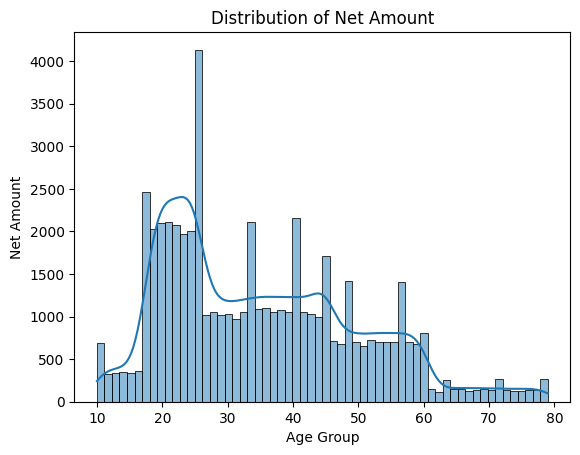

In [111]:
sns.histplot(df['Age Group'], kde=True)
plt.title('Distribution of Net Amount')
plt.xlabel('Age Group')
plt.ylabel('Net Amount')
plt.show()

In [112]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Product Category'] = label_encoder.fit_transform(df['Product Category'])
df['Discount Availed'] = label_encoder.fit_transform(df['Discount Availed'])

In [113]:
df.head()

,Age Group,Product Category,Discount Availed,Discount Amount (INR),Net Amount
0,39,3,1,64.30,661.004000
1,45,3,1,175.19,4463.801875
2,73,2,1,211.54,1774.832575
3,78,7,0,0.00,5695.612650
4,21,7,1,439.92,1852.731500


In [114]:
corr_matrix = df.corr()

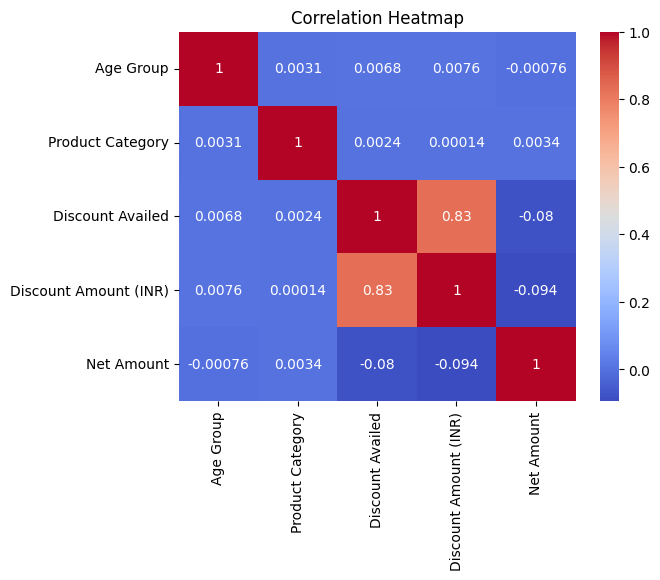

In [115]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [126]:
# Features and target
X = df[[ 'Product Category','Discount Amount (INR)','Age Group','Discount Availed']]
y = df['Net Amount']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [127]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest MSE: {rf_mse}')

Random Forest MSE: 3220924.8628379824


In [128]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f'XGBoost MSE: {xgb_mse}')

XGBoost MSE: 3035482.8010252607


In [129]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [130]:
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting rounds
    'max_depth': [3, 4, 5],      # Maximum depth of a tree
    'learning_rate': [0.01, 0.1], # Step size shrinkage
    'subsample': [0.8, 1.0],      # Fraction of samples to use for each tree
    'colsample_bytree': [0.8, 1.0] # Fraction of features to use for each tree
}

In [131]:
xgb_model = XGBRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3,
                           verbose=1, n_jobs=-1)

In [132]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [133]:
best_predictions = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_predictions)
print(f'Best Model MSE: {best_mse}')

Best Model MSE: 2923535.2753199576


In [134]:
from sklearn.metrics import r2_score
best_mse = mean_squared_error(y_test, best_predictions)
best_r2 = r2_score(y_test, best_predictions)

print(f'Best Model MSE: {best_mse}')
print(f'Best Model R² Score: {best_r2}')

Best Model MSE: 2923535.2753199576
Best Model R² Score: 0.009537526199203783


# Improving r2 score

- When the age group is transformed using label encoder. the r2 score gives the negative value near to -0.0002 so, I tranformed the age group column into random integer wrt the category so after that the r2 score gets increased till 0.001 (aprrox)

# Summary insights

- When the negative values from the net amount are removed which in general means that the sale has been in loss for that product because of provding more disscount

# Challenges
- Deleting the negative value was affecting the r2 score and data loss was occuring so choosing that was also not the right thing.


# Interpretation from the graphs
- From the graph of distribution of net amount it has been observed that the majority of the amount spent are the people ranges between 18 to 60 in that also majority of them are between 18 to 26. So our target audience can be the age group 18-25. Where we can increase the possibilities of the sales.

In [ ]:
df.shape

(55000, 5)

In [ ]:
df.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location'],
      dtype='object')

In [ ]:
col = ['Gender', 'Age Group',
       'Product Category', 'Discount Availed','Purchase Method', 'Net Amount']

In [ ]:
df = df[col]

In [ ]:
df.head()

,Gender,Age Group,Product Category,Discount Availed,Purchase Method,Net Amount
0,Female,25-45,Electronics,Yes,Credit Card,661.004000
1,Male,25-45,Electronics,Yes,Credit Card,4463.801875
2,Other,60 and above,Clothing,Yes,Credit Card,1774.832575
3,Other,60 and above,Sports & Fitness,No,Debit Card,5695.612650
4,Male,18-25,Sports & Fitness,Yes,Credit Card,1852.731500


In [ ]:
df.describe()

,Net Amount
count,55000.000000
mean,2875.949810
std,1726.127778
min,-351.119775
25%,1429.551863
50%,2814.910875
75%,4211.407838
max,8394.825600


In [ ]:
for negative_value in df['Net Amount']:
    if negative_value < 0:
        print(negative_value)
    else:
        pass

In [ ]:
#checking the null values if available
df.isnull().sum()

,0
Gender,0
Age Group,0
Product Category,0
Discount Availed,0
Discount Amount (INR),0
Gross Amount,0
Net Amount,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 55000 non-null  object 
 1   Age Group              55000 non-null  object 
 2   Product Category       55000 non-null  object 
 3   Discount Availed       55000 non-null  object 
 4   Discount Amount (INR)  55000 non-null  float64
 5   Gross Amount           55000 non-null  float64
 6   Net Amount             55000 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.9+ MB


In [ ]:
df['Age Group'].unique()

array(['25-45', '60 and above', '18-25', '45-60', 'under 18'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['age_encoded'] = label_encoder.fit_transform(df['Age Group'])

In [ ]:
df.head()

,Gender,age_encoded,Product Category,Discount Availed,Discount Amount (INR),Gross Amount,Net Amount
0,0,1,3,1,64.30,725.304000,661.004000
1,1,1,3,1,175.19,4638.991875,4463.801875
2,2,3,2,1,211.54,1986.372575,1774.832575
3,2,3,7,0,0.00,5695.612650,5695.612650
4,1,0,7,1,439.92,2292.651500,1852.731500


In [ ]:
df = df[['Gender', 'age_encoded',
       'Product Category', 'Discount Availed',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount']]

In [ ]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Product Category'] = label_encoder.fit_transform(df['Product Category'])
df['Discount Availed'] = label_encoder.fit_transform(df['Discount Availed'])

In [ ]:
df.corr()

,Gender,age_encoded,Product Category,Net Amount
Gender,1.000000,-0.002393,0.004693,0.011077
age_encoded,-0.002393,1.000000,0.001644,0.003682
Product Category,0.004693,0.001644,1.000000,0.003415
Net Amount,0.011077,0.003682,0.003415,1.000000


In [ ]:
df = df[['Gender', 'age_encoded',
       'Product Category', 'Net Amount']]

In [ ]:
df.head()

,Gender,age_encoded,Product Category,Net Amount
0,0,1,3,661.004000
1,1,1,3,4463.801875
2,2,3,2,1774.832575
3,2,3,7,5695.612650
4,1,0,7,1852.731500


In [ ]:
df.columns

Index(['Gender', 'age_encoded', 'Product Category', 'Net Amount'], dtype='object')

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [ ]:
# Features and target
X = df[['Gender', 'age_encoded', 'Product Category']]
y = df['Net Amount']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest MSE: {rf_mse}')

Random Forest MSE: 2966114.714647422


In [ ]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f'XGBoost MSE: {xgb_mse}')

XGBoost MSE: 2965875.8687134446


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [ ]:
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting rounds
    'max_depth': [3, 4, 5],      # Maximum depth of a tree
    'learning_rate': [0.01, 0.1], # Step size shrinkage
    'subsample': [0.8, 1.0],      # Fraction of samples to use for each tree
    'colsample_bytree': [0.8, 1.0] # Fraction of features to use for each tree
}

In [ ]:
xgb_model = XGBRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3,
                           verbose=1, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [ ]:
best_predictions = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_predictions)
print(f'Best Model MSE: {best_mse}')

Best Model MSE: 2954057.152598859


In [ ]:
from sklearn.metrics import r2_score
best_mse = mean_squared_error(y_test, best_predictions)
best_r2 = r2_score(y_test, best_predictions)

print(f'Best Model MSE: {best_mse}')
print(f'Best Model R² Score: {best_r2}')

Best Model MSE: 2954057.152598859
Best Model R² Score: -0.0002221005895277628
